In [51]:
import pandas as pd
import re
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import cleandata as cd

/home/rinnely/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
test_df = pd.read_csv('clean_classified_aborto.csv')

In [57]:
train_df = pd.read_csv('train_NH.csv')

In [6]:
train_df.head()

,id,Tweet,Stance
0,1224118352148385793,"Hace 15 años, la USER genera lazos a través de...",0
1,1224118330950344706,En 2019 el estado mexicano de Oaxaca y el aust...,0
2,1224114750428274690,También en #Jujuy El proyecto está en las call...,0
3,1224110020062740482,"El 19 de Febrero volvemos a las calles, y en C...",0
4,1224106619061055488,"Esto sí es una ""obra"" pero no artística. Esto ...",1


In [9]:
test_df.Stance.unique()

array(['N', 'F', 'C'], dtype=object)

In [11]:
test_df.query("Stance == 'F'")

,Tweet,Tema,Stance
2,hoy las mujeres argentinas somos más libres.,aborto,F
4,"mainumby, la conozco, y a su madre. por varios...",aborto,F
5,están adoctrinando nenes q no saben ni cómo se...,aborto,F
6,noticia uruguaya; no queremos que todas aborte...,aborto,F
8,no tiñeron la argentina de celeste: se apropia...,aborto,F
...,...,...,...
427,esos diputados que hasta ahora se ganaron un l...,aborto,F
428,todxs necesitamos la ley de aborto. quiero que...,aborto,F
429,"“...porque si este proyecto fuera rechazado, l...",aborto,F
430,el proyecto de la USER platea la interrupción ...,aborto,F


In [12]:
test_df.query("Stance == 'C'")

,Tweet,Tema,Stance
3,el niño por nacer es un ser humano a partir de...,aborto,C
7,#noabortolibre cada uno tiene derecho a elegir...,aborto,C
9,ser custodias de la vida es un privilegio que ...,aborto,C
13,duele ver mujeres levantando sus puños para qu...,aborto,C
19,"#sialavida cada gesto cuenta... madre, tu don ...",aborto,C
...,...,...,...
419,⚪Ángeles rawson era activista provida. ⚪chiara...,aborto,C
421,virgen maría cuida y protege a los no nacidos ...,aborto,C
423,#sialasdosvidas hoy nos vemos en el congreso! URL,aborto,C
424,USER se suma a unas cuantas que mueren x abort...,aborto,C


In [13]:
test_df.query("Stance == 'N'")

,Tweet,Tema,Stance
0,USER USER prensa tendenciosa de un periodista ...,aborto,N
1,sonríe siempre 😄 hay mil motivos para ser feli...,aborto,N
10,justicia social es,aborto,N
15,gran final 💚 URL,aborto,N
18,por fin alguien puso huevo y se animó a decir ...,aborto,N
...,...,...,...
405,12:27. congreso.. URL,aborto,N
408,249 bailarinas se reunieron hoy en mu para gri...,aborto,N
417,USER USER USER gran programa!!! 👏👏 💚,aborto,N
420,lo que defienden // lo que deberian defender. ...,aborto,N


In [19]:
test_df = test_df.query("Stance == 'F' or Stance == 'C'")

In [30]:
test_df['Stance'] = test_df['Stance'].replace({'F':0, 'C':1})

/home/rinnely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
test_df = test_df[['Stance','Tweet']]

In [80]:
test_df = cd.cleanData(test_df, 'Tweet', emojis=True)

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 2 to 431
Data columns (total 2 columns):
Stance    329 non-null int64
Tweet     329 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


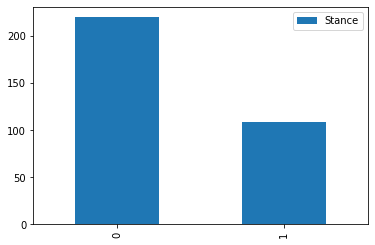

In [90]:
test_df['Stance'].value_counts().plot.bar(legend=True)

In [91]:
test_df['Stance'].value_counts()

0    220
1    109
Name: Stance, dtype: int64

In [83]:
test_df.to_csv('clean_test_aborto500.csv', index=False)

In [62]:
train_df['Tweet'] = train_df['Tweet'].str.lower()

In [66]:
train_df = cd.cleanData(train_df, 'Tweet', urls='URL', ussers='USER', emojis=True)

In [67]:
train_df

,id,Tweet,Stance
0,1224118352148385793,"hace 15 años, la USER genera lazos a través de...",0
1,1224118330950344706,en 2019 el estado mexicano de oaxaca y el aust...,0
2,1224114750428274690,también en #jujuy el proyecto está en las call...,0
3,1224110020062740482,"el 19 de febrero volvemos a las calles, y en c...",0
4,1224106619061055488,"esto sí es una ""obra"" pero no artística. esto ...",1
...,...,...,...
2857,1222678352328261633,"en #méxico, 200 mujeres están en prisión por a...",0
2858,1222677476490514432,desdecdmx les apoyamos porque #mexicoesprovida...,1
2859,1222676274474299392,la sana práctica que aterra a los abortistas...,1
2860,1222664128453578752,"“mi #pañueloverde no obliga a #abortar, pero t...",0


In [68]:
train_df.query("Stance == 0")

,id,Tweet,Stance
0,1224118352148385793,"hace 15 años, la USER genera lazos a través de...",0
1,1224118330950344706,en 2019 el estado mexicano de oaxaca y el aust...,0
2,1224114750428274690,también en #jujuy el proyecto está en las call...,0
3,1224110020062740482,"el 19 de febrero volvemos a las calles, y en c...",0
5,1224105223536488449,"pasó una hora más, recuerden que #sonresponsab...",0
...,...,...,...
2847,1222700966778150912,"por si lo habían olvidado, durante esta hora s...",0
2852,1222693602469601286,mi hija se fue a noa de vacaciones. dentro de ...,0
2855,1222688271542771712,ile hay una sola y,0
2857,1222678352328261633,"en #méxico, 200 mujeres están en prisión por a...",0


In [69]:
train_df.query("Stance == 1")

,id,Tweet,Stance
4,1224106619061055488,"esto sí es una ""obra"" pero no artística. esto ...",1
6,1224103105664561152,"""tremendo testimonio de rebecca kiessling quie...",1
10,1224098268172472320,el último videoclip de #ricky_martin muestra u...,1
11,1224095313410965504,claro q si!!!!! todas las vidas tienen un prop...,1
12,1224080863794618370,la vida humana se respeta #noalcodigoolga #noa...,1
...,...,...,...
2854,1222690226864381952,no hay humanidad en un asesinato.,1
2856,1222682305447198721,a esto llaman “derecho”. quiénes hacen esto so...,1
2858,1222677476490514432,desdecdmx les apoyamos porque #mexicoesprovida...,1
2859,1222676274474299392,la sana práctica que aterra a los abortistas...,1


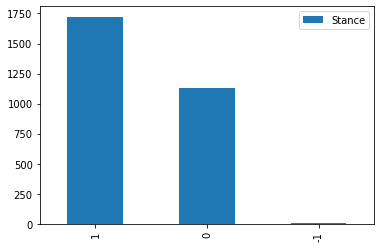

In [70]:
train_df['Stance'].value_counts().plot.bar(legend=True)

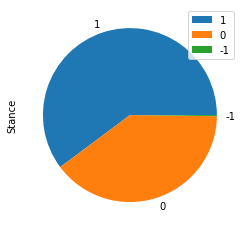

In [71]:
train_df['Stance'].value_counts().plot.pie(legend=True)

In [72]:
train_data = train_df.query('Stance == 0').sample(n=1000)

In [73]:
train_data = train_data.append(train_df.query('Stance == 1').sample(n=1000))

In [74]:
train_data

,id,Tweet,Stance
2383,1229421415163727873,#19f pañuelazo en formosa a partir de las 18 h...,0
1989,1228437862208692225,"encuestas de rcn, el chiste se cuenta solo así...",0
1935,1212940929298030595,"USER es el orgullx de esa juventud, de esas mu...",0
2048,1228379605209235456,hoy también es el día del amor propio . . . #f...,0
1506,1232696826115088390,"""será ley"", el texto de USER en favor de la lu...",0
...,...,...,...
122,1223690104868343808,siempre levantaré mí voz em defensa de los no ...,1
1951,1212871186557865984,esto es una barbaridad! URL,1
330,1216261383865688064,ahí lo dejo URL,1
1470,1232720160227823616,no queremos una corte a favor del aborto. no ...,1


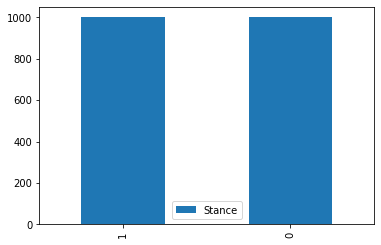

In [75]:
train_data['Stance'].value_counts().plot.bar(legend=True)

In [84]:
train_data = train_data[['Stance','Tweet']]

In [85]:
train_data.head()

,Stance,Tweet
2383,0,#19f pañuelazo en formosa a partir de las 18 h...
1989,0,"encuestas de rcn, el chiste se cuenta solo así..."
1935,0,"USER es el orgullx de esa juventud, de esas mu..."
2048,0,hoy también es el día del amor propio . . . #f...
1506,0,"""será ley"", el texto de USER en favor de la lu..."


In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2383 to 2402
Data columns (total 2 columns):
Stance    2000 non-null int64
Tweet     2000 non-null object
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


In [89]:
train_data.to_csv('clean_train_aborto.csv', index=False)